In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.set_printoptions(linewidth=120)
import matplotlib.pyplot as mpimg
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import imageio
import glob
from skimage import color
import skimage.transform
from skimage import io
import warnings
warnings.filterwarnings("ignore")

In [0]:
#0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise

y_label = []
All_images= []

path = "."

def add_label(emotion):
    images_path = glob.glob("/content/drive/My Drive/Emotion_classifier/sorted_set/%s/*" %emotion )
    for image in images_path:
        y_label.append(emotion)
        img_file = os.path.join(path, image)
        img = color.rgb2gray(io.imread(img_file))
        img = skimage.transform.resize(img, (490, 640))
        All_images.append(img)


add_label("0")
add_label("1")
add_label("2")
add_label("3")
add_label("4")
add_label("5")
add_label("6")
add_label("7")
#y_label = np.array(y_label)
#X = np.array(X)
#print(y_label)



x shape 653
y label of 0 0


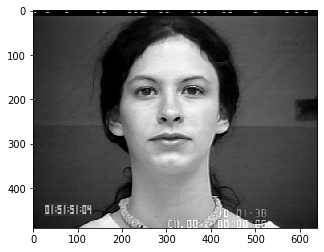

In [0]:
print("x shape", len(All_images))
plt.imshow(All_images[0], cmap='gray')
print("y label of 0",y_label[0])

In [0]:
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import torchvision.transforms.functional as vision_F
import torchvision.transforms as vision_T
print("original images length", len(All_images))
print(len(y_label))
new_All_images_augmented = []
new_y_augmented = []
for i in range(len(All_images)):
  #normal image
  new_All_images_augmented.append(All_images[i])
  new_y_augmented.append(y_label[i])
  # rotate the image 15
  new_All_images_augmented.append(rotate(All_images[i], angle = 15))
  new_y_augmented.append(y_label[i])
  # rotate the image 15
  new_All_images_augmented.append(rotate(All_images[i], angle = 25))
  new_y_augmented.append(y_label[i])
  # rotate the image 45 degrees
  new_All_images_augmented.append(rotate(All_images[i], angle = 45))
  new_y_augmented.append(y_label[i])
  # rotate the image -15
  new_All_images_augmented.append(rotate(All_images[i], angle = -15))
  new_y_augmented.append(y_label[i])
  # rotate the image -25
  new_All_images_augmented.append(rotate(All_images[i], angle = -25))
  new_y_augmented.append(y_label[i])
  # rotate the image -45 degrees
  new_All_images_augmented.append(rotate(All_images[i], angle = -45))
  new_y_augmented.append(y_label[i])
  #flip
  new_All_images_augmented.append(np.flipud(All_images[i]))
  new_y_augmented.append(y_label[i])
  new_All_images_augmented.append(np.fliplr(All_images[i]))
  new_y_augmented.append(y_label[i])
  #add noise
  new_All_images_augmented.append(random_noise(All_images[i], var = 0.1**2))
  new_y_augmented.append(y_label[i])


print("augmented images length", len(new_All_images_augmented))
print("augmented labels",len(new_y_augmented))
#to minimize ram usage


original images length 653
653
augmented images length 6530
augmented labels 6530


labels 0 0 0 0 0 0


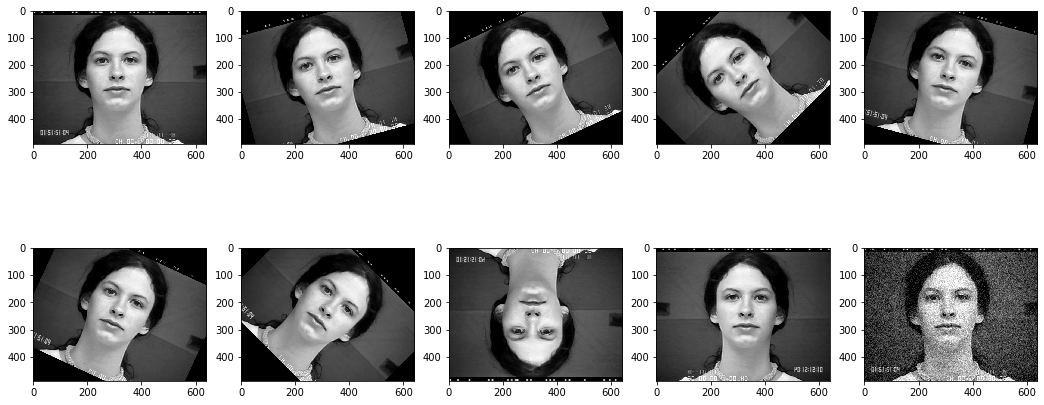

In [0]:

print("labels", new_y_augmented[0], new_y_augmented[1], new_y_augmented[2] , new_y_augmented[3],new_y_augmented[4],new_y_augmented[5])
fig = plt.figure(figsize=(18,8))
a = fig.add_subplot(2, 5, 1)
imgplot = plt.imshow(new_All_images_augmented[0], cmap = 'gray')
a = fig.add_subplot(2, 5, 2)
imgplot = plt.imshow(new_All_images_augmented[1],cmap = 'gray')
a = fig.add_subplot(2, 5, 3)
imgplot = plt.imshow(new_All_images_augmented[2],cmap = 'gray')
a = fig.add_subplot(2, 5, 4)
imgplot = plt.imshow(new_All_images_augmented[3],cmap = 'gray')
a = fig.add_subplot(2, 5, 5)
imgplot = plt.imshow(new_All_images_augmented[4],cmap = 'gray')
a = fig.add_subplot(2, 5, 6)
imgplot = plt.imshow(new_All_images_augmented[5], cmap = 'gray')
a = fig.add_subplot(2, 5, 7)
imgplot = plt.imshow(new_All_images_augmented[6], cmap = 'gray')
a = fig.add_subplot(2, 5, 8)
imgplot = plt.imshow(new_All_images_augmented[7], cmap = 'gray')
a = fig.add_subplot(2, 5, 9)
imgplot = plt.imshow(new_All_images_augmented[8], cmap = 'gray')
a = fig.add_subplot(2, 5, 10)
imgplot = plt.imshow(new_All_images_augmented[9], cmap = 'gray')

In [0]:
from sklearn.utils import shuffle
new_All_images_augmented = np.array(new_All_images_augmented)
new_All_images_augmented = new_All_images_augmented[:,np.newaxis,:,:]
print(new_All_images_augmented.dtype)
y_label = np.array(new_y_augmented,dtype= 'float32')
print("images shape",new_All_images_augmented.shape)
print("y label shape", y_label.shape)
new_All_images_augmented, y_label = shuffle(new_All_images_augmented,y_label, random_state = 0)

In [0]:
new_y_augmented = []
print("labels", y_label[0], y_label[1], y_label[2] , y_label[3],y_label[4],y_label[5])
fig = plt.figure(figsize=(20,20))
a = fig.add_subplot(1, 6, 1)
imgplot = plt.imshow(new_All_images_augmented[0].reshape(98,128), cmap = 'gray')
a = fig.add_subplot(1, 6, 2)
imgplot = plt.imshow(new_All_images_augmented[1].reshape(98,128),cmap = 'gray')
a = fig.add_subplot(1, 6, 3)
imgplot = plt.imshow(new_All_images_augmented[2].reshape(98,128),cmap = 'gray')
a = fig.add_subplot(1, 6, 4)
imgplot = plt.imshow(new_All_images_augmented[3].reshape(98,128),cmap = 'gray')
a = fig.add_subplot(1, 6, 5)
imgplot = plt.imshow(new_All_images_augmented[4].reshape(98,128),cmap = 'gray')
a = fig.add_subplot(1, 6, 6)
imgplot = plt.imshow(new_All_images_augmented[5].reshape(98,128),cmap = 'gray')

In [0]:
#split train and test data
mask = np.random.rand(len(new_All_images_augmented)) < 0.9
Train_images = new_All_images_augmented[mask]
Test_images = new_All_images_augmented[~mask]
Train_labels = y_label[mask]
Test_labels = y_label[~mask]


print("train images shape",Train_images.shape)
print("test images shape",Test_images.shape)
print("train labels shape",Train_labels.shape)
print("test labels shape", Test_labels.shape)

In [0]:
#clear ram space
new_All_images_augmented = []
y_label = []

In [0]:
torch.cuda.is_available()

In [0]:
#we make tensors and assign them to gpu
#train images
Train_images_tensor = torch.tensor(Train_images, dtype=torch.float32)
Train_images_tensor = Train_images_tensor.cuda()
print("train images device",Train_images_tensor.device, "type", Train_images_tensor.dtype)
#print("train images tensor shape",Train_images_tensor.shape)
#test images
Test_images_tensor = torch.tensor(Test_images, dtype=torch.float32)
Test_images_tensor = Test_images_tensor.cuda()
print("test images device",Test_images_tensor.device, "type", Test_images_tensor.dtype)
#print("test images tensor shape",Test_images_tensor.shape)
#train labels
Train_labels_tensor = torch.tensor(Train_labels,dtype=torch.float32)
Train_labels_tensor = Train_labels_tensor.cuda()
print("train labels device",Train_labels_tensor.device, "type", Train_labels_tensor.dtype)
#print("train labels tensor shape",Train_labels_tensor.shape)
#print(Train_labels[0:5])
#test labels one hot
Test_labels_tensor = torch.tensor(Test_labels,dtype=torch.float32)
Test_labels_tensor = Test_labels_tensor.cuda()
print("test labels device",Test_labels_tensor.device, "type", Test_labels_tensor.dtype)
#print("test labels tensor shape",Test_labels_tensor.shape)


In [0]:
print("train images tensor shape",Train_images_tensor.shape)
print("test images tensor shape",Test_images_tensor.shape)
print("train labels tensor shape",Train_labels_tensor.shape)
print("test labels tensor shape",Test_labels_tensor.shape)

In [0]:
class STN(nn.Module):
  def __init__ (self, input_channels, dimensions, kernel_size, dropout_prob, dropout = False):
    super(STN, self).__init__()
    self.height, self.width = dimensions
    self.input_channels = input_channels
    self.kernel_size = kernel_size
    self.dropout = dropout
    self.dropout_probability = dropout_prob

    #this creates the localization network, input channels svhn is 3 emotion input channels = 1
    self.conv1 = nn.Conv2d(in_channels = self.input_channels, out_channels= 4, kernel_size= self.kernel_size)
    self.conv2 = nn.Conv2d(in_channels = 4,out_channels = 8, kernel_size= self.kernel_size)

    self.fc1 = nn.Linear(8*22*29, 300)
    self.fc2 = nn.Linear(300, 150)
    self.fc3 = nn.Linear(150, 6) #output is 6 bc affine matrix is size 2*3 see paper

  #we now forward the stn module output is matrix 2x3 and input is feature map
  def forward(self, x):

    batch_images = x
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2)


    #print("output size after convolutional layers:{}".format(x.size()))
    #if the figures shapes are square we can use this as input
    size_conv_layer = x.size(-1)
    size_conv_2 = x.size(-2)
    #print(size_conv_layer,size_conv_2)
    x = x.view(-1, 8*size_conv_layer*size_conv_2)

    if self.dropout:
      x = F.dropout(self.fc1(x), p = self.dropout_probability)
      x = F.dropout(self.fc2(x), p = self.dropout_probability)
      x = F.dropout(self.fc3(x), p = self.dropout_probability)
    else:
      x = self.fc1(x)
      x = self.fc2(x)
      x = self.fc3(x)

    #print("after linear layers size:{}".format(x.size()))
    #but we need a 2x3 matrix
    x = x.view(-1, 2,3) 
    #print("after reshape:{}".format(x.size()))
    theta = x
    # tensors are to be laid out as C x H x W (channels, height, and width, respectively)
    affine_grid = F.affine_grid(theta,torch.Size((x.size(0), self.input_channels, self.height, self.width)))
    #print("batch images size", batch_images.size(0))
    assert(affine_grid.size(0) == batch_images.size(0)) # 
    region = F.grid_sample(batch_images, affine_grid)
    #print("region of interes", region.size())
    return region, affine_grid

In [0]:
class Network(nn.Module):
  def __init__(self, dropout_prob = 0.5 , dropout = False):
    super(Network, self).__init__() #we now have a network class that has all
    #the attributes of the pytorch nn module class
    self.dropout = dropout
    self.dropout_probability = dropout_prob
    self.kern_size_stn = 4
    self.dim = (98,128)
    self.channels = 1

    self.Spatial_Transform = STN(self.channels,self.dim,self.kern_size_stn, self.dropout_probability, dropout =self.dropout)

    self.conv1 = nn.Conv2d(in_channels= 1, out_channels = 6, kernel_size= 5) #in channels = 3 bc RGB
    #kernel_size sets the filter size
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
    #fc = fully connected

    self.fc1 = nn.Linear(in_features = 12*21*29, out_features = 800)
    self.fc2 = nn.Linear(in_features = 800, out_features = 400)
    self.fc3 = nn.Linear(in_features = 400, out_features= 200)
    self.fc4 = nn.Linear(in_features = 200, out_features = 75)
    self.out = nn.Linear(in_features = 75, out_features = 8)

  def forward(self, tensortje):
    #input layer
    x = tensortje
    region, affine_grid = self.Spatial_Transform(x)
    # first hidden conv layer
    t = self.conv1(region) 
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size = 2, stride = 2) 
    # second hidden conv
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size = 2, stride = 2)

    #print("size output layers conv", t.size(-1), t.size(-2))
    x = t.size(-1)
    y = t.size(-2)
    t = t.reshape(-1, 12*x*y)
    if self.dropout:
      #hidden layer
      t = F.dropout(self.fc1(t), p = self.dropout_probability)
      t = F.dropout(self.fc2(t), p = self.dropout_probability)
      t = F.dropout(self.fc3(t), p = self.dropout_probability)
      t = F.dropout(self.fc4(t), p = self.dropout_probability)
    else:
      t = self.fc1(t)
      t = self.fc2(t)
      t = self.fc3(t)
      t = self.fc4(t)

    t = self.out(t)
    return t

In [0]:
batch_size = 50
n_iters = 1000
num_epochs = n_iters / len(Train_images_tensor) / batch_size
num_epohcs = int(num_epochs)

train = torch.utils.data.TensorDataset(Train_images_tensor, Train_labels_tensor)
test = torch.utils.data.TensorDataset(Test_images_tensor, Test_labels_tensor)
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

In [0]:
def get_num_correct(preds, labels):
  return preds.argmax(dim = 1).eq(labels).sum().item()

In [0]:
import time
from sklearn import metrics
network = Network(dropout= True, dropout_prob= 0.05)
network.cuda()

accuracy_list = []
epoch_list = []
loss_list = []
accuracy_list_test = []
loss_list_test = []
F_one_score = 0

error = nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters(), lr = 0.00001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5, amsgrad=False)
#optimizer = optim.Adam(network.parameters(), lr = 0.0001)
epochs = 2001
start = time.time()
# network.parameters returns all the weights
for epoch in range(epochs):
  total_loss = 0
  total_correct = 0
  total_loss_test = 0
  total_correct_test = 0
  for batch in train_loader:
    images, labels = batch
    preds = network(images) # pass the batch
    loss = F.cross_entropy(preds, labels.type(torch.LongTensor).cuda()) 

    optimizer.zero_grad() # pytorch accumulates gradients so we have to zero 
    #gradients before we update the gradients zero_grad doenst work zero_grad()!
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)
    accuracy = total_correct/ len(train)
  for test_batch in test_loader:
    images, labels = test_batch
    preds = network(images)
    loss = F.cross_entropy(preds, labels.type(torch.LongTensor).cuda())

    #F_one_score = metrics.f1_score(labels.type(torch.LongTensor).cuda(), preds)
    
    total_loss_test += loss.item()
    total_correct_test += get_num_correct(preds, labels)
    accuracy_test = total_correct_test/ len(test)

  loss_list_test.append(total_loss_test)
  accuracy_list_test.append(accuracy_test)
  loss_list.append(total_loss)
  accuracy_list.append(accuracy)
  epoch_list.append(epoch)
  if epoch % 20 == 0:
    print( "epoch:", epoch, "loss", round(total_loss,4), "Accuracy: ", round(accuracy,4), "%", " Test loss", round(total_loss_test,4), "Accuracy Test: ", round(accuracy_test,4), "%")
    print("Time trained: " , round((time.time() - start)/60, 2 ))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2751: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


epoch: 0 loss 205.8847 Accuracy:  0.4677 %  Test loss 19.9887 Accuracy Test:  0.5462 %
Time trained:  0.04
epoch: 20 loss 180.9845 Accuracy:  0.5114 %  Test loss 19.1925 Accuracy Test:  0.54 %
Time trained:  0.83
epoch: 40 loss 147.214 Accuracy:  0.6027 %  Test loss 16.7117 Accuracy Test:  0.6062 %
Time trained:  1.62
epoch: 60 loss 128.4874 Accuracy:  0.6563 %  Test loss 14.9787 Accuracy Test:  0.6492 %
Time trained:  2.42
epoch: 80 loss 119.664 Accuracy:  0.6862 %  Test loss 13.7056 Accuracy Test:  0.6754 %
Time trained:  3.21
epoch: 100 loss 108.3596 Accuracy:  0.7117 %  Test loss 13.2621 Accuracy Test:  0.7031 %
Time trained:  4.0
epoch: 120 loss 101.5748 Accuracy:  0.734 %  Test loss 13.1547 Accuracy Test:  0.6954 %
Time trained:  4.8
epoch: 140 loss 96.5174 Accuracy:  0.7406 %  Test loss 12.1975 Accuracy Test:  0.7015 %
Time trained:  5.59
epoch: 160 loss 87.8425 Accuracy:  0.7636 %  Test loss 12.2135 Accuracy Test:  0.7246 %
Time trained:  6.38
epoch: 180 loss 86.7236 Accuracy: 

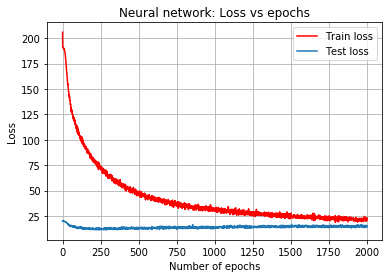

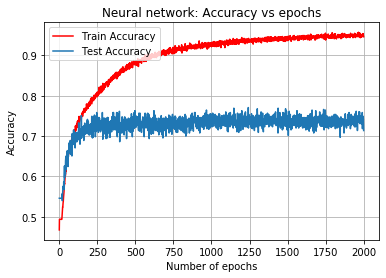

In [0]:
plt.plot(epoch_list, loss_list, color = 'red', label = 'Train loss')
plt.plot(epoch_list, loss_list_test, label = 'Test loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Neural network: Loss vs epochs")
plt.legend( loc = 'upper right')
plt.grid()
plt.show()

plt.plot(epoch_list, accuracy_list, color = "red", label = 'Train Accuracy')
plt.plot(epoch_list, accuracy_list_test, label = 'Test Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Neural network: Accuracy vs epochs")
plt.legend( loc = 'upper left')
plt.grid()
plt.show()

In [0]:
def predictions_per_category(my_network, data):
  total_preds = torch.tensor([]).cuda()
  total_labels = torch.tensor([]).cuda()
  for batch in data:
    images,labels = batch
    preds = my_network(images)
    total_preds = torch.cat((total_preds,preds), dim = 0)
    total_labels = torch.cat((total_labels,labels), dim = 0)
    return total_preds,total_labels

In [0]:
batch_size = 10000
test = torch.utils.data.TensorDataset(Test_images_tensor, Test_labels_tensor)
test_loader_val = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

test_preds, test_labels = predictions_per_category(network,test_loader_val)
correct_pred = get_num_correct(test_preds, test_labels)
print(len(test_labels))
print("correct predicitons:", correct_pred)
score = correct_pred/len(test_labels)
print("accuracy:", correct_pred/len(test_labels))

650
correct predicitons: 473
accuracy: 0.7276923076923076


In [0]:
true_pred = test_preds.argmax(dim = 1)
true_pred = torch.tensor(true_pred, dtype = torch.float32).cuda()
print(true_pred.dtype)
print(true_pred)

torch.float32
tensor([0., 0., 0., 7., 7., 0., 0., 0., 1., 3., 7., 0., 3., 0., 0., 5., 3., 0., 0., 0., 5., 7., 0., 7., 2., 3., 0., 0.,
        6., 2., 7., 5., 0., 0., 0., 2., 0., 0., 0., 7., 0., 0., 0., 5., 0., 3., 5., 0., 7., 0., 0., 5., 0., 7., 7., 2.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 5., 0., 0., 0., 0., 4., 0., 1., 5., 0., 5., 1., 7., 5., 3., 5., 7.,
        0., 0., 0., 0., 0., 0., 2., 0., 7., 0., 1., 0., 0., 0., 0., 0., 5., 7., 0., 0., 0., 0., 0., 0., 0., 0., 4., 5.,
        0., 2., 0., 7., 0., 7., 0., 0., 1., 0., 0., 7., 0., 7., 0., 0., 0., 0., 0., 0., 1., 7., 0., 0., 0., 1., 0., 0.,
        5., 0., 0., 0., 5., 0., 5., 7., 0., 0., 6., 0., 0., 0., 0., 7., 0., 0., 0., 0., 0., 0., 3., 0., 0., 1., 0., 5.,
        0., 7., 0., 5., 0., 3., 5., 0., 6., 0., 7., 0., 0., 0., 3., 0., 6., 6., 0., 0., 0., 0., 1., 0., 0., 3., 0., 0.,
        0., 0., 3., 0., 7., 4., 0., 0., 1., 0., 0., 0., 0., 0., 5., 5., 0., 0., 0., 0., 0., 5., 5., 5., 5., 3., 0., 0.,
        7., 5., 0., 0., 0.

In [0]:
stacked_tens = torch.stack((test_labels,true_pred),dim = 1)
print(stacked_tens.shape)
test_length = len(stacked_tens)

torch.Size([650, 2])


In [0]:
stacked_tens = torch.tensor(stacked_tens, dtype = torch.int64)
print(stacked_tens)

tensor([[0, 0],
        [3, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 1],
        [4, 0]])


In [0]:
matrix_list = torch.zeros(10,10,dtype=torch.int64).cuda()

rate1 = [0,0]
rate2 = [1,0]
rate3 = [2,0]
rate4 = [3,0]
rate5 = [4,0]
rate6 = [5,0]
rate7 = [6,0]
rate8 = [7,0]

for i in stacked_tens:
  label1,pred1 = i.tolist()
  if label1 == pred1:
    if label1 == rate1[0]:
      rate1[1] += 1
    if label1 == rate2[0]:
      rate2[1] += 1
    if label1 == rate3[0]:
      rate3[1] += 1
    if label1 == rate4[0]:
      rate4[1] += 1
    if label1 == rate5[0]:
      rate5[1] += 1
    if label1 == rate6[0]:
      rate6[1] += 1
    if label1 == rate7[0]:
      rate7[1] += 1
    if label1 == rate8[0]:
      rate8[1] += 1

rate1[1] = rate1[1]/test_length
rate2[1] = rate2[1]/test_length
rate3[1] = rate3[1]/test_length
rate4[1] = rate4[1]/test_length
rate5[1] = rate5[1]/test_length
rate6[1] = rate6[1]/test_length
rate7[1] = rate7[1]/test_length
rate8[1] = rate8[1]/test_length
print("rate 1:", rate1[1])
print("rate 1:", rate2[1])
print("rate 1:", rate3[1])
rates_list = [rate1[1],rate2[1],rate3[1],rate4[1],rate5[1],rate6[1],rate7[1],rate8[1],]

rate 1: 0.46153846153846156
rate 1: 0.02923076923076923
rate 1: 0.004615384615384616


Text(0.5, 1.0, 'classification rate for every emotion')

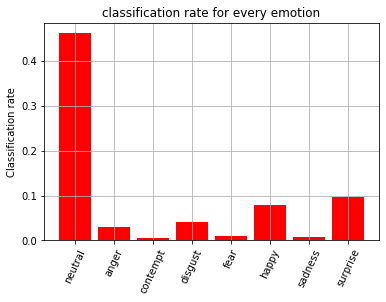

In [0]:
names = ('neutral','anger','contempt','disgust','fear','happy','sadness','surprise')
plt.bar(names,rates_list, color = 'red')
plt.xticks(names,rotation = 65)
plt.grid()
plt.ylabel("Classification rate")
plt.title("classification rate for every emotion")

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_labels = test_labels.cpu()
test_preds = test_preds.cpu()
print(test_labels.device)
cm = confusion_matrix( test_labels, test_preds.argmax(dim =1))
print(cm)

cpu
[[300   5  17   6   5  10   5   7]
 [ 11  19   0   2   0   1   3   1]
 [ 17   0   3   0   0   1   0   0]
 [ 13   6   2  26   0   2   3   1]
 [  7   2   0   0   6   3   0   1]
 [ 10   0   0   3   0  51   1   3]
 [ 13   1   0   0   0   0   5   0]
 [  7   1   1   4   0   1   1  63]]


correct predicitons: 472
accuracy: 0.7261538461538461


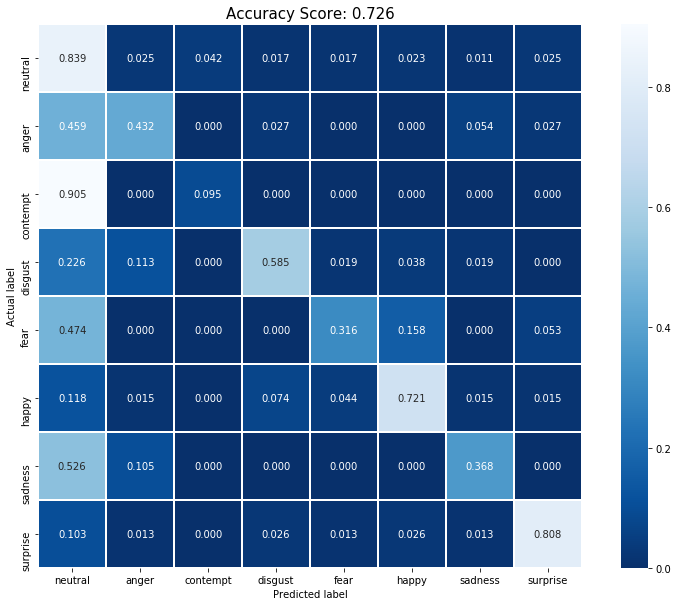

In [0]:
batch_size = 10000
test = torch.utils.data.TensorDataset(Test_images_tensor, Test_labels_tensor)
test_loader_val = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

test_preds, test_labels = predictions_per_category(network,test_loader_val)
correct_pred = get_num_correct(test_preds, test_labels)
#print(len(test_labels))
print("correct predicitons:", correct_pred)
score = correct_pred/len(test_labels)
print("accuracy:", correct_pred/len(test_labels))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_labels = test_labels.cpu()
test_preds = test_preds.cpu()
#print(test_labels.device)
cm = confusion_matrix( test_labels, test_preds.argmax(dim =1))
#print(cm)

names = ('neutral','anger','contempt','disgust','fear','happy','sadness','surprise')
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(14,10))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, linecolor='white',square = True, cmap = 'Blues_r', xticklabels = names, yticklabels = names)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

[0.80978261 0.44444444 0.10526316 0.63265306 0.33333333 0.74242424
 0.4        0.82352941]


Text(0.5, 1.0, 'F1 score for every emotion')

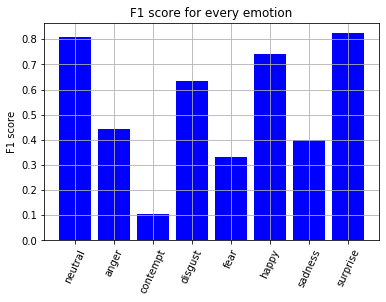

In [0]:
#print(test_labels)
test_pred_true = torch.tensor(test_preds.argmax(dim =1), dtype = torch.int32)
#print(test_pred_true)
F1 = metrics.f1_score(test_labels,test_pred_true, average=None)
print(F1)

names = ('neutral','anger','contempt','disgust','fear','happy','sadness','surprise')
plt.bar(names,F1, color = 'blue')
plt.xticks(names,rotation = 65)
plt.grid()
plt.ylabel("F1 score")
plt.title("F1 score for every emotion")